In [1]:
# Author    : David Darigan
# ID        : C00263218

In [63]:
%pip install scikit-learn
%pip install matplotlib
%pip install --upgrade --force-reinstall pillow
%pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached pillow-10.2.0-cp311-cp311-manylinux_2_28_x86_64.whl (4.5 MB)
  Attempting uninstall: pillow
    Found existing installation: pillow 10.2.0
    Uninstalling pillow-10.2.0:
      Successfully uninstalled pillow-10.2.0
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached plotly-5.18.0-py3-none-any.whl (15.6 MB)
  Using cached tenacity-8.2.3-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


Changelog

The following changes are listed from earliest to latest in descending order.

-----------
- Import SVC (Support Vector Machine) from sklearn SVM
-----------
- Import Data
-----------
- Split Data into training/testing sets
-----------
- SVMs cannot use categorical data directly, requires encoding
-----------
- Use pd.get_dummies to encode category variables into numeric values
-----------
- Ran an accuracy score check and found 0.68% accuracy, a little low.
-----------
- Changing random state to 20 brings accuracy to 0.77%, (21 and 19 are both significantly lower)
-----------
- Attempted to add Confusion Matrix but labels/data are wrong

In [1]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import joblib
import plotly.figure_factory as ff


import pandas as pd

In [4]:
# Import Data
data = pd.read_csv("heart.csv")

In [5]:
# Encode categorial values to numerical values
data = pd.get_dummies(data, drop_first=True)


In [6]:
# Separate features (X) and target variable (y)
X = data.drop('HeartDisease', axis=1) 
y = data['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [7]:

# Creating the Support Vector Machine
svm_model = SVC(kernel='rbf', random_state=20) 
classifier = svm_model.fit(X_train, y_train)
predictions = svm_model.predict(X_test)

In [8]:
# Initial Evaluation
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.7771739130434783
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        85
           1       0.77      0.83      0.80        99

    accuracy                           0.78       184
   macro avg       0.78      0.77      0.77       184
weighted avg       0.78      0.78      0.78       184



ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (16).

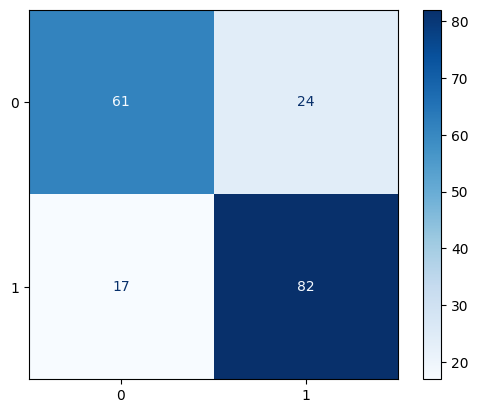

In [9]:
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=data.columns.values,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()